## Scientific Computing 2021: Homework Assignment 2 
Due Monday October 18, 2021 (23:59)

### Problem 1 (2 points)
Let $A_q=\left(\begin{matrix}1 & q\\ 0 & 1\end{matrix}\right)$ with $q\in\mathbb R$. 
* For any $q$, find condition number $\kappa(A_q)$ with respect to the $l^2$-norm.

#### 1.1

$$
\kappa(A)=\sqrt{\frac{\lambda_{\max}(A^*A)}{\lambda_{\min}(A^*A)}}
$$
$A^*$ turns out to be just $A^T$ in case that $A_{ij}\in\mathbb R$.

So $A^* = A^T = \left(\begin{matrix}1 & 0\\ q & 1\end{matrix}\right)$

Thus, $A^*A = \left(\begin{matrix}1 & q\\ q & 1 + q^2\end{matrix}\right)$

Finding eigenvals from condition: $\det(A^*A -\lambda E) = 0$

All eigenvals given by $\lambda_{1,2} = \frac{2+q^2 \pm \sqrt{q^4+4q^2}}{2}$

Finally got expression for condition number: $k(A) = \sqrt{\frac{2+q^2 + \sqrt{q^4 + 4q^2}}{2+q^2 - \sqrt{q^4 + 4q^2}}}$

#### Let's validate our formula

In [1]:
import numpy as np

In [2]:
q = 2.28
A = np.array([[1, q], [0, 1]])

def get_kappa(q):
    return np.sqrt((2 + q**2 + np.sqrt(q**4 + 4*q**2)) / (2 + q**2 - np.sqrt(q**4 + 4*q**2)))

print('{} vs {}'.format(np.linalg.cond(A), get_kappa(q)))

7.056690511917566 vs 7.056690511917571


* Give an example of specific values of $q,\mathbf b, \Delta\mathbf b$ such that, when solving $A_q\mathbf x = \mathbf b$ and $A_q(\mathbf x+\Delta \mathbf x)=\mathbf b +\Delta\mathbf b$, we get 

$$\frac{\|\Delta \mathbf x\|}{\|\mathbf x\|}\ge 10^6\frac{\|\Delta\mathbf b\|}{\|\mathbf b\|}.$$

#### 1.2

In [3]:
q = 1e10
A = np.array([[1, q], [0, 1]])
b = np.array([1e6, 1])
delta_b = np.array([1e5, 1e7])

b_frac = np.linalg.norm(delta_b) / np.linalg.norm(b)

X = np.dot(np.linalg.inv(A), b)
delta_X = np.dot(np.linalg.inv(A), delta_b)

x_frac = np.linalg.norm(delta_X) / np.linalg.norm(X)

x_frac / b_frac > 1e6

True

### Problem 2 (2 points)
* Write a program to compute an approximate value for the derivative of a function using the finite-difference formula 

  $$f'(x)\approx \frac{f(x+h)-f(x)}{h}.$$

  Test your program using the function $\tan(x)$ at $x=1$. Determine the error by comparing with the value obtained using the analytic derivative. Plot the magnitude of the error as a function of $h$, for $h=10^{-k}, k=0,\ldots,16$. You should use log scale for $h$ and for the magnitude of the error. What is the minimum value of the error and at which $h$ is it achieved? Explain this result theoretically.

#### 2.1

In [4]:
import matplotlib.pyplot as plt
import sympy as sp
import math as m

In [5]:
class Derivative:
    def __init__(self, f, h, cffs):
        self.args = []
        self.f = f
        self.h = h
        self.coeffs = cffs

    def SetCoeffs(self, cffs):
        self.coeffs = cffs

    def __call__(self, x):
        if len(self.args) == 0:
            raise NotImplementedError
        f, h = self.f, self.h
        coeffs = self.coeffs
        args = self.args
        result = 0
        for coeff, arg in zip(coeffs, args):
            result += coeff * f(x + h * arg)
        return result / h

In [6]:
xSym = sp.Symbol('x')

functionsSym = [sp.tan(xSym)]
functions = [sp.lambdify(xSym, f) for f in functionsSym]
derivativesAnalyticalSym = [sp.diff(f, xSym) for f in functionsSym]
derivativesAnalytical = [sp.lambdify(xSym, f) for f in derivativesAnalyticalSym]

x0 = 1

steps = [10 ** (-n) for n in range(0, 17)]

In [7]:
def plot_derivative(num_div_class, style='', title=''):
    for f, derivativeAnalytical in zip(functions, derivativesAnalytical):
        errors = []
        for h in steps:
            derivative = num_div_class(f, h)
            error = np.abs(derivative(x0) - derivativeAnalytical(x0))
            errors.append(error)

        plt.title(f'Convergence of numerical derivatives')
        plt.xlabel('h')
        plt.ylabel('Error')
        plt.loglog(steps, errors, style, linewidth=1, markersize=7, label=title)
        
        index = np.argsort(errors)[0]
        print(f'Minumun value of error achieved by {title} approach on {steps[index]} step:', min(errors))

In [8]:
class DerivativeNum1(Derivative):
    def __init__(self, f, h):
        super().__init__(f, h, [1, -1])
        self.args = [1, 0]

* Repeat the exercise using the centered difference approximation

 $$f'(x)\approx \frac{f(x+h)-f(x-h)}{2h}.$$

 What is now different and why?

#### 2.2

In [9]:
class DerivativeNum2(Derivative):
    def __init__(self, f, h):
        super().__init__(f, h, [1 / 2, -1 / 2])
        self.args = [1, -1]

Minumun value of error achieved by Finite Difference approach on 1e-08 step: 2.554135347665465e-08
Minumun value of error achieved by Centered Difference approach on 1e-06 step: 6.2239102760486276e-12


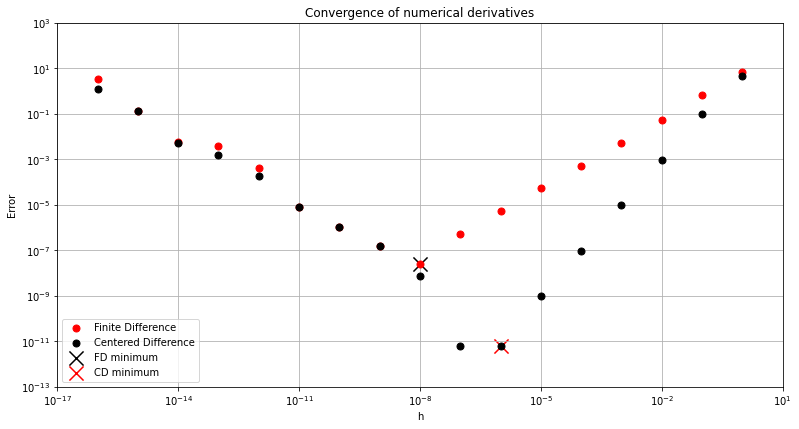

In [10]:
plt.figure(figsize=(13, 6.7))
plot_derivative(DerivativeNum1, style='ro', title='Finite Difference')
plot_derivative(DerivativeNum2, style='ko', title='Centered Difference')

p1 = 2.554135347665465e-08
plt.scatter(1e-08, p1, label='FD minimum', color='k', marker='x', s=200)

p2 = 6.2239102760486276e-12
plt.scatter(1e-06, p2, label='CD minimum', color='r', marker='x', s=200)

plt.grid()
plt.legend()
plt.xlim(1e-17, 1e1)
plt.ylim(1e-13, 1e3)
plt.autoscale(False)
plt.show()

#### 2.1 Theory

Let $|f(x+h)-\tilde f(x+h)| = \epsilon$

\begin{equation*}
\implies |f^{'}(x)-\frac{\tilde f(x+h)-\tilde f(x)}{h}| = |f^{'}(x)-\frac{f(x+h)+\epsilon-f(x)+\epsilon}{h}|
\tag{1}
\end{equation*}

\begin{equation*}
f(x+h)\approx f(x)+hf^{'}(x)+\frac{h^{2}}{2}f{''}(x)
\tag{2}
\end{equation*}

Substituing 2 in 1:

$$\implies |f^{'}(x)-\frac{\tilde f(x+h)-\tilde f(x)}{h}| = |f^{'}(x)-\frac{f(x)+hf^{'}(x)+\frac{h^{2}}{2}f{''}(x)}{h}+\frac{f(x)}{h}+\frac{2\epsilon}{h}| \approx \frac{h|f^{''}(x)|}{2}+\frac{2\epsilon}{h}$$

$$\implies \frac{d}{dh}\Big(\frac{h|f^{''}(x)|}{2}+\frac{2\epsilon}{h}\Big) = 0\\
\implies h_{opt}\approx  2\sqrt{\frac{\epsilon}{|f^{''}(x)|}}$$

In [11]:
eps = 1 - np.tan(np.pi / 4) # Rounding error
eps

1.1102230246251565e-16

In [12]:
drv1 = sp.diff(sp.tan(xSym), xSym) 
drv2 = sp.diff(drv1, xSym)

drv2_val = sp.lambdify(xSym, drv2)(x0)

h_opt = 2 * np.sqrt(eps/ abs(drv2_val))

print('h_opt:', h_opt)

h_opt: 6.451426763204424e-09


#### 2.2 Theory

Similarly for central difference method and using Taylor's expansion to the third term:

$$|f^{'}(x)-\frac{\tilde f(x+h)-\tilde f(x-h)}{h}| \approx \frac{h^2|f^{'''}(x)|}{6}+\frac{2\epsilon}{h}$$.

$$h_{min} = \Big(\frac{6\epsilon}{|f{'''}(x)|}\Big)^\frac{1}{3}$$.

In [13]:
drv1 = sp.diff(sp.tan(xSym), xSym) 
drv2 = sp.diff(drv1, xSym)
drv3 = sp.diff(drv2, xSym)

drv3_val = sp.lambdify(xSym, drv3)(x0)

h_min = np.power(6 * eps / abs(drv3_val), 1/3)

print('h_min:', h_min)

h_min: 2.273274156839064e-06


#### Conclusions

In [14]:
print('Finite Difference theoretical min condition:', h_opt)
print('Which is about actual', 1e-08)

print('\nCentered Difference theoretical min condition:', h_min)
print('Which is about actual', 1e-06)

Finite Difference theoretical min condition: 6.451426763204424e-09
Which is about actual 1e-08

Centered Difference theoretical min condition: 2.273274156839064e-06
Which is about actual 1e-06


### Problem 3 (2 points)
* Implement regularized regression with an adaptive choice of regularization parameter. Your algorithm must accept the training data (`Xtrain`, `Ytrain`) and the input part of test data (`Xtest`), and output a prediction for test data (`Ypred`). You may use standard linear algebra libraries, but not specialized predictive modeling software (e.g., `scikit-learn`). Your algorithm should choose the regularization parameter by some optimization over a reasonable range of values and may use a sub-division of the training data into a train-in-train and a test-in-train components.
* Test your algorithm on real data from UCI repository:
  * https://archive.ics.uci.edu/ml/datasets/Relative+location+of+CT+slices+on+axial+axis
  * https://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure
  
  Use random subsets of 300 rows as training sets, and the remaining rows as the test sets. Use the relative RMS error as the measure of accuracy.
  Compare your results with results of some linear models implemented in standard predictive modeling software    (e.g., `Ridge` and `LinearRegression` from `scikit-learn`).

In [15]:
# # Install a conda package in the current Jupyter kernel
# import sys
# !conda install --yes --prefix {sys.prefix} sympy

#### Reading data

In [16]:
import pandas as pd

In [17]:
data = pd.read_csv('slice_localization_data.csv')
data.head(5)

,patientId,value0,value1,value2,value3,value4,value5,value6,value7,value8,...,value375,value376,value377,value378,value379,value380,value381,value382,value383,reference
0,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.980381,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.803851
1,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.745726
2,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.687600
3,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.977008,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.629474
4,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,-0.25,...,-0.25,0.976833,0.0,0.0,0.0,0.0,0.0,-0.25,-0.25,21.571348


#### Implementing train_test_split approach

In [18]:
def get_train_test_split(dataset=None, train_size=None):
    if dataset is None or train_size is None:
        raise Exception('Wrong number of arguments')
    
    A = dataset.iloc[:, :-1]
    A.drop(columns='patientId', inplace=True)
    b = dataset.iloc[:,-1:]
        
    ind = np.random.permutation(dataset.shape[0])
    
    train = ind[:train_size]
    test = ind[train_size:]
    
    return A.iloc[train], b.iloc[train], A.iloc[test], b.iloc[test]

In [19]:
X_train, y_train, X_test, y_test = get_train_test_split(data, train_size=300)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (300, 384)
y_train: (300, 1)
X_test: (53200, 384)
y_test: (53200, 1)


#### Implementing linear regression model

In [20]:
def get_score(y_model, y_real):
    diff = y_model - y_real
    diff1 = y_real - np.mean(y_real)
    return np.sqrt(np.mean(diff**2)) / np.sqrt(np.mean(diff1**2)) 

In [21]:
class MyLinearRegression:
    def __init__(self):
        self.reg_params_ = np.linspace(0.1, 100, 100)
        self.best_param_ = {'mu': None}
        self.min_loss_ = None
        self.weights_ = None
        self.K = 5
        self.losses = []
    
    def get_cross_val_folds(self, X, y, k=None):
        if k == None:
            raise Exception
            
        return np.array_split(X, k), np.array_split(y, k)
    
    def extract_train_folds(self, folds_list, test_id):
        res = []
        for index, fold in enumerate(folds_list):
            if index != test_id:
                res.append(fold)
                
        return np.array(res).reshape(-1, len(folds_list[0][0]))
    
    def fit(self, X, y):
        x_folds, y_folds = self.get_cross_val_folds(X, y, k=self.K)
        
        for p in self.reg_params_:
            score = 0
            
            for test_fold_id in range(self.K):
                
                X_train = self.extract_train_folds(x_folds, test_fold_id)
                y_train = self.extract_train_folds(y_folds, test_fold_id)
                X_test = x_folds[test_fold_id]
                y_test = y_folds[test_fold_id]
                
                tmp = np.linalg.inv(np.dot(X_train.T, X_train) + p * np.eye(X_train.shape[1]))
                w = np.dot(np.dot(tmp, X_train.T), y_train)
                
                score += get_score(np.dot(X_test, w), y_test)
            
            score /= self.K
            self.losses.append(score)
            self.min_loss_ = score if self.min_loss_ is None else min(self.min_loss_, score)
            self.weights_ = w if self.min_loss_ == score else self.weights_
            self.best_param_['mu'] = p if self.min_loss_ == score else self.best_param_['mu']
        
    def predict(self, X):
        return np.dot(X, self.weights_)

In [22]:
from sklearn.linear_model import LinearRegression, Ridge

In [23]:
my_lin_reg = MyLinearRegression()

my_lin_reg.fit(X_train.values, y_train.values)
y_pred = my_lin_reg.predict(X_test.values)
print('Custom regression error:', *get_score(y_pred, y_test))

lin_reg = LinearRegression()
ridge_reg = Ridge()

lin_reg.fit(X_train.values, y_train.values)
y_pred = lin_reg.predict(X_test.values)
print('Linear Regression error:', *get_score(y_pred, y_test))

ridge_reg.fit(X_train.values, y_train.values)
y_pred = ridge_reg.predict(X_test.values)
print('Ridge regression error:', *get_score(y_pred, y_test))

Custom regression error: 0.4919453746389978
Linear Regression error: 1.386092978581231
Ridge regression error: 0.5661053963849755


In [24]:
import matplotlib.pyplot as plt

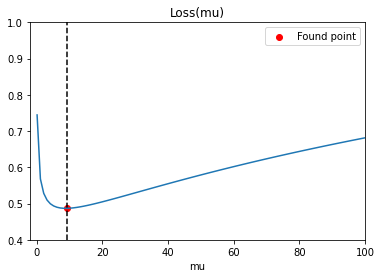

In [25]:
plt.plot(my_lin_reg.reg_params_, my_lin_reg.losses)
plt.title('Loss(mu)')
plt.xlabel('mu')

plt.vlines(my_lin_reg.best_param_['mu'], ymin=0.4, ymax=1, color='k', linestyles='dashed')

plt.scatter(my_lin_reg.best_param_['mu'], my_lin_reg.min_loss_, label='Found point', color='r')

plt.xlim(-2, 100)
plt.ylim(0.4, 1.0)
plt.autoscale(False)
plt.legend()
plt.show()

In [26]:
my_lin_reg.best_param_

{'mu': 9.181818181818182}

#### Applying GridSearch for Ridge regression

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
ridge_params = {'alpha': np.logspace(-6, 3)}

ridge_gs = GridSearchCV(Ridge(), ridge_params)
ridge_gs.fit(X_train.values, y_train.values)

y_pred = ridge_gs.predict(X_test.values)
print('GS Ridge regression error:', *get_score(y_pred, y_test))

GS Ridge regression error: 0.46847355854809125


In [29]:
ridge_gs.best_params_

{'alpha': 14.563484775012444}

### Problem 4 (2 points)
Suppose that we use the Leapfrog algorithm with some $\Delta t$ to simulate the dynamics of the harmonic oscillator (https://en.wikipedia.org/wiki/Harmonic_oscillator) with positive mass $m$ and force constant $k$ (in other words, with the energy function $H=\frac{m\dot x^2}{2}+\frac{kx^2}{2}$). Assuming a perfect implementation of Leapfrog, at which combinations of $\Delta t, m, k$ will the simulation diverge as $n\to\infty$, in the sense that $\sup_n(\tilde x_n^2+\tilde v_{n+1/2}^2)=\infty$?

Leapfrog input system of quations:

$\tilde x_{n+1} = \tilde x_{n}+\tilde v_{n+1/2}\Delta t$
$\tilde v_{n+1/2} = \tilde v_{n-1/2}+f_1(\tilde x_n)\Delta t$

Let $f(x_n) = -\frac{k}{m} x_n$

Thus,

$\begin{pmatrix} x_{n+1}\\ v_{n+\frac{1}{2}}\end{pmatrix} = \begin{pmatrix} 1 - \frac{k}{m}\Delta t^2 & \Delta t\\ -\frac{k}{m}\Delta t & 1\end{pmatrix} \begin{pmatrix} x_{n+1} \\ u_{n+1/2}\end{pmatrix}$

The solution represents as:

$\begin{pmatrix} x_{n+1} \\ v_{n+1/2} \end{pmatrix} = \lambda_1^n \vec{u}_1 + \lambda_2^n \vec{u}_2$

$\lambda_{1,2} = \frac{2-\frac{k\Delta t^2}{m} \pm \sqrt{\frac{k^2\Delta t^4}{m^2} - \frac{4k\Delta t^2}{m}}}{2}$

$\frac{k\Delta t^2}{m} < 4 \Rightarrow \lambda < -1 \Rightarrow \sup_{n} \lambda^n \to \infty \Rightarrow$ system does not converge

Thus, we found the disconvergence condition

### Problem 5 (2 points)
Consider the velocity Verlet method for solving the equation $\frac{d}{dt}{x\choose v}={v\choose f_1(x)}$: 

\begin{align}
\tilde v_{n+1/2} &= \tilde v_{n}+\frac{1}{2}f_1(\tilde x_n)\Delta t\\
\tilde x_{n+1} &= \tilde x_{n}+\tilde v_{n+1/2}\Delta t\\
\tilde v_{n+1} &= \tilde v_{n+1/2}+\frac{1}{2}f_1(\tilde x_{n+1})\Delta t
\end{align}
Find its global convergence order and verify it experimentally.